 # Run RF models
  1. Is a good a idea consider the variables with more correlation. 
  2. I add all the variables beacuse I don't have enough knowledge of the variables. 
  3. The code is ajusted to run the model with the variable that you want (applies for RF).

In [2002]:
import pandas as pd

path_file = '../DataIn/Data_Performance_CompletSet3.xlsx'

# Leer la hoja especificada
df = pd.read_excel(path_file, sheet_name='Sheet1')

df.head()

,01_Tabanca,02_Moranca,0_Nome_atu,A5_Indeg_ContrExtAusencia,A6_Indeg_ApoioSpeDiqCint,A7_Indeg_ApoioSpeTubos,A8_Indeg_ApoioLevDiqCintura,A9_Indeg_ControlDiqPriqDiqCint,A10_Indeg_ReparDiqPriqDiqCint,A11_Indeg_Con1Re2DiqPriqDiqCint,...,B4_VarExp_MelhorTecnTubos,B5_VarExp_DisMorParc,B6_Area_bolanha,B7_Max_ClassZon,B8_Moy_ClassZon,B9_Som_ClassZon,VDep1_MoyProdArroz,VDep2_MoyInd_ExistPb,VDep3_MoyInd_ScalaPbGeneral,VDep4_MoyInd_ScalaPbSomP1-P2
0,NTchugal,Atxugn,Aiace Quior,1,4,2,1,1,0,1,...,0,1112.275742,2.3644,2,2.0,4,2.0,1,2,2.0
1,Bsoran,Antamba,Albat Calabus,0,2,0,0,2,2,4,...,0,1729.745054,1.5186,1,1.0,1,2.0,1,1,1.0
2,NTchugal,Abicuntche,Antonio Mbunh,1,2,2,0,2,2,4,...,0,1196.167221,1.9217,1,1.0,1,3.0,0,0,0.0
3,Fanhi,Acana,Antonio Ndafa,1,1,1,2,0,1,2,...,4,1476.515523,1.5891,2,2.0,2,3.0,1,1,1.0
4,Fanhi,Anghassa,Augusto Sumba,0,3,2,2,0,0,0,...,0,3460.639956,1.2757,2,2.0,2,3.0,1,1,1.0


#### Split data into independent and independent data

In [6364]:
variables_independientes = ['0_Nome_atu',
                            'A5_Indeg_ContrExtAusencia',
                            'A6_Indeg_ApoioSpeDiqCint',	
                            'A7_Indeg_ApoioSpeTubos',
                            'A8_Indeg_ApoioLevDiqCintura',
                            'A9_Indeg_ControlDiqPriqDiqCint',
                            'A10_Indeg_ReparDiqPriqDiqCint',
                            'A11_Indeg_Con1Re2DiqPriqDiqCint',
                            'A12_Indeg_CoopTotWM', 
                            'B1_VarExp_IndForcaFugon',	
                            'B2_VarExp_IndInvestDiq',	
                            'B3_VarExp_IndMelhorTecnDiqCint',
                            'B4_VarExp_MelhorTecnTubos'	,
                            'B5_VarExp_DisMorParc'	,
                            'B6_Area_bolanha',
                            'B7_Max_ClassZon',
                            'B8_Moy_ClassZon',
                            'B9_Som_ClassZon']

#variables_independientes = ['0_Nome_atu',
                         #   'A5_Indeg_ContrExtAusencia',
                          #  'A6_Indeg_ApoioSpeDiqCint',	
                          #  'A7_Indeg_ApoioSpeTubos',
                          #  'A8_Indeg_ApoioLevDiqCintura',
                          #  'A9_Indeg_ControlDiqPriqDiqCint',
                          #  'A10_Indeg_ReparDiqPriqDiqCint',
                          #  'A11_Indeg_Con1Re2DiqPriqDiqCint',
                          #  'A12_Indeg_CoopTotWM', 
                          #  'B1_VarExp_IndForcaFugon',	
                           # 'B2_VarExp_IndInvestDiq',	
                           # 'B3_VarExp_IndMelhorTecnDiqCint',
                         #   'B4_VarExp_MelhorTecnTubos'	,
                         #   'B5_VarExp_DisMorParc'	,
                          #  'B6_Area_bolanha',
                          #  'B7_Max_ClassZon',
                           # 'B8_Moy_ClassZon',
                          #  'B9_Som_ClassZon']

indep_variables = df[variables_independientes]
indep_variables.head()

,0_Nome_atu,A5_Indeg_ContrExtAusencia,A6_Indeg_ApoioSpeDiqCint,A7_Indeg_ApoioSpeTubos,A8_Indeg_ApoioLevDiqCintura,A9_Indeg_ControlDiqPriqDiqCint,A10_Indeg_ReparDiqPriqDiqCint,A11_Indeg_Con1Re2DiqPriqDiqCint,A12_Indeg_CoopTotWM,B1_VarExp_IndForcaFugon,B2_VarExp_IndInvestDiq,B3_VarExp_IndMelhorTecnDiqCint,B4_VarExp_MelhorTecnTubos,B5_VarExp_DisMorParc,B6_Area_bolanha,B7_Max_ClassZon,B8_Moy_ClassZon,B9_Som_ClassZon
0,Aiace Quior,1,4,2,1,1,0,1,7,1.0,3,3,0,1112.275742,2.3644,2,2.0,4
1,Albat Calabus,0,2,0,0,2,2,4,3,2.0,4,3,0,1729.745054,1.5186,1,1.0,1
2,Antonio Mbunh,1,2,2,0,2,2,4,4,1.0,4,9,0,1196.167221,1.9217,1,1.0,1
3,Antonio Ndafa,1,1,1,2,0,1,2,3,1.0,4,3,4,1476.515523,1.5891,2,2.0,2
4,Augusto Sumba,0,3,2,2,0,0,0,7,1.0,3,3,0,3460.639956,1.2757,2,2.0,2


In [6365]:
variables_dependientes = ['0_Nome_atu','VDep1_MoyProdArroz',	'VDep2_MoyInd_ExistPb',	'VDep3_MoyInd_ScalaPbGeneral',	'VDep4_MoyInd_ScalaPbSomP1-P2']
dep_variables = df[variables_dependientes]
dep_variables.head()

,0_Nome_atu,VDep1_MoyProdArroz,VDep2_MoyInd_ExistPb,VDep3_MoyInd_ScalaPbGeneral,VDep4_MoyInd_ScalaPbSomP1-P2
0,Aiace Quior,2.0,1,2,2.0
1,Albat Calabus,2.0,1,1,1.0
2,Antonio Mbunh,3.0,0,0,0.0
3,Antonio Ndafa,3.0,1,1,1.0
4,Augusto Sumba,3.0,1,1,1.0


In [6366]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from openpyxl import Workbook
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [6367]:
import pandas as pd

path_file = '../DataIn/Data_Performance_CompletSet3.xlsx'

# Leer la hoja especificada
df = pd.read_excel(path_file, sheet_name='Sheet1')

df.head()

,01_Tabanca,02_Moranca,0_Nome_atu,A5_Indeg_ContrExtAusencia,A6_Indeg_ApoioSpeDiqCint,A7_Indeg_ApoioSpeTubos,A8_Indeg_ApoioLevDiqCintura,A9_Indeg_ControlDiqPriqDiqCint,A10_Indeg_ReparDiqPriqDiqCint,A11_Indeg_Con1Re2DiqPriqDiqCint,...,B4_VarExp_MelhorTecnTubos,B5_VarExp_DisMorParc,B6_Area_bolanha,B7_Max_ClassZon,B8_Moy_ClassZon,B9_Som_ClassZon,VDep1_MoyProdArroz,VDep2_MoyInd_ExistPb,VDep3_MoyInd_ScalaPbGeneral,VDep4_MoyInd_ScalaPbSomP1-P2
0,NTchugal,Atxugn,Aiace Quior,1,4,2,1,1,0,1,...,0,1112.275742,2.3644,2,2.0,4,2.0,1,2,2.0
1,Bsoran,Antamba,Albat Calabus,0,2,0,0,2,2,4,...,0,1729.745054,1.5186,1,1.0,1,2.0,1,1,1.0
2,NTchugal,Abicuntche,Antonio Mbunh,1,2,2,0,2,2,4,...,0,1196.167221,1.9217,1,1.0,1,3.0,0,0,0.0
3,Fanhi,Acana,Antonio Ndafa,1,1,1,2,0,1,2,...,4,1476.515523,1.5891,2,2.0,2,3.0,1,1,1.0
4,Fanhi,Anghassa,Augusto Sumba,0,3,2,2,0,0,0,...,0,3460.639956,1.2757,2,2.0,2,3.0,1,1,1.0


#### Split data into independent and independent data

In [ ]:
variables_independientes = ['0_Nome_atu',
#        'A5_Indeg_ContrExtAusencia',
        'A6_Indeg_ApoioSpeDiqCint',	
#        'A7_Indeg_ApoioSpeTubos',
        'A8_Indeg_ApoioLevDiqCintura',
     ###################### 'A9_Indeg_ControlDiqPriqDiqCint',
     #######################'A10_Indeg_ReparDiqPriqDiqCint',
        'A11_Indeg_Con1Re2DiqPriqDiqCint',
      #######################'A12_Indeg_CoopTotWM',
                                                               'B1_VarExp_IndForcaFugon',
         'B2_VarExp_IndInvestDiq',
        'B3_VarExp_IndMelhorTecnDiqCint',
         ###'B4_VarExp_MelhorTecnTubos',
 ##       'B5_VarExp_DisMorParc',
      #    'B6_Area_bolanha',
#         'B7_Max_ClassZon',
         'B8_Moy_ClassZon',
#         'B9_Som_ClassZon'
                            ]

indep_variables = df[variables_independientes]
indep_variables.head()

#All independent variables + Description (see appendix 1 in manuscript)
#  variables_independientes = [
# '0_Nome_atu',
# 'A5_Indeg_ContrExtAusencia' = Cooperation for controlling dikes in case of prolonged absence in-degree ,
# 'A6_Indeg_ApoioSpeDiqCint'= Cooperation in technical advice and support for complex belt dike works in-degree  ,                           
# 'A7_Indeg_ApoioSpeTubos'= Cooperation in technical advice and support for installing PVC drainage pipes in-degree,	
# 'A8_Indeg_ApoioLevDiqCintura = Cooperation for dike maintenance in-degree ',
# 'A11_Indeg_Con1Re2DiqPriqDiqCint' = Cooperation for dike monitoring and repair in-degree ,  
# 'B1_VarExp_IndForcaFugon' = Indicator of the Household Labour for Water Management (HLWM,	
# 'B2_VarExp_IndInvestDiq' = Indicator of dike investment level ,	
# 'B3_VarExp_IndMelhorTecnDiqCint' = Indicator of the reputation as great dike specialists ,                        
#  'B4_VarExp_MelhorTecnTubos' = Indicator of the reputation as great tube technicians ,	,
# 'B5_VarExp_DisMorParc' = average distance from home to cultivated HHs´ clustered plots 	,
# 'B6_Area_bolanha' = total area of rice paddies ,
# 'B8_Moy_ClassZon' = MSR field risk level,
#]

NameError: name 'df' is not defined

In [6402]:
variables_dependientes = ['0_Nome_atu','VDep1_MoyProdArroz',	'VDep2_MoyInd_ExistPb',	'VDep3_MoyInd_ScalaPbGeneral',	'VDep4_MoyInd_ScalaPbSomP1-P2']
dep_variables = df[variables_dependientes]
dep_variables.head()

,0_Nome_atu,VDep1_MoyProdArroz,VDep2_MoyInd_ExistPb,VDep3_MoyInd_ScalaPbGeneral,VDep4_MoyInd_ScalaPbSomP1-P2
0,Aiace Quior,2.0,1,2,2.0
1,Albat Calabus,2.0,1,1,1.0
2,Antonio Mbunh,3.0,0,0,0.0
3,Antonio Ndafa,3.0,1,1,1.0
4,Augusto Sumba,3.0,1,1,1.0


In [ ]:
# From here you can take the name of what you want to model.
# variables_dependientes = 'VDep1_MoyProdArroz',	'VDep2_MoyInd_ExistPb',	'VDep3_MoyInd_ScalaPbGeneral',	'VDep4_MoyInd_ScalaPbSomP1-P2'

variable_a_predecir = dep_variables['VDep4_MoyInd_ScalaPbSomP1-P2']
#VDep4_MoyInd_ScalaPbSomP1-P2 = Water Management Performance Index (WMPI)

# Define the dependent variable and the independent variables
X = indep_variables.drop(columns=['0_Nome_atu'])
y = variable_a_predecir

y.head()

0    2.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: VDep4_MoyInd_ScalaPbSomP1-P2, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62) # 0.18 ; 22(0.15)-26(0.33)-29(11.4_best story)-
#31(0.325_best story)-50-56(29.5_best story)-73(29_best story) /     0.2; 10(0.26)- 31(0.37_good story)- 39(12.5 - R2gen 79)- 56(30.6_best story)-
# -62(30_beststory); 69(32-good story) /    0.22 ; 56(34.3_best story) - 73 (38) /  0.23 ; 1(40.2-badstory) - 31 (48) - 39 (36_good model & good R2 gen)-
# -73 (45.6-moy story) / 0.24 ; 1 (48) / 0.25; 1(48) - 62 (37.8 - good story) / 0.26; 1(42.3) -       ...  / 0.3;1 (46.5_note R2 gen 68).

### With ind força fugon:
#0.18 ; 1(44.4); / 0.2; 62(42.3 - best story)   / 0.23;1 (48.8); 73(47.7) / 0.24;1(56.1 - moy story) / 0.25;1(56.1- moy story); 62(46.7 - good story)

# Scaling the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=150, random_state=62)
rf.fit(X_train_scaled, y_train)

# Making predictions
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)


Mean Squared Error: 0.3067
R^2 Score: 0.3445


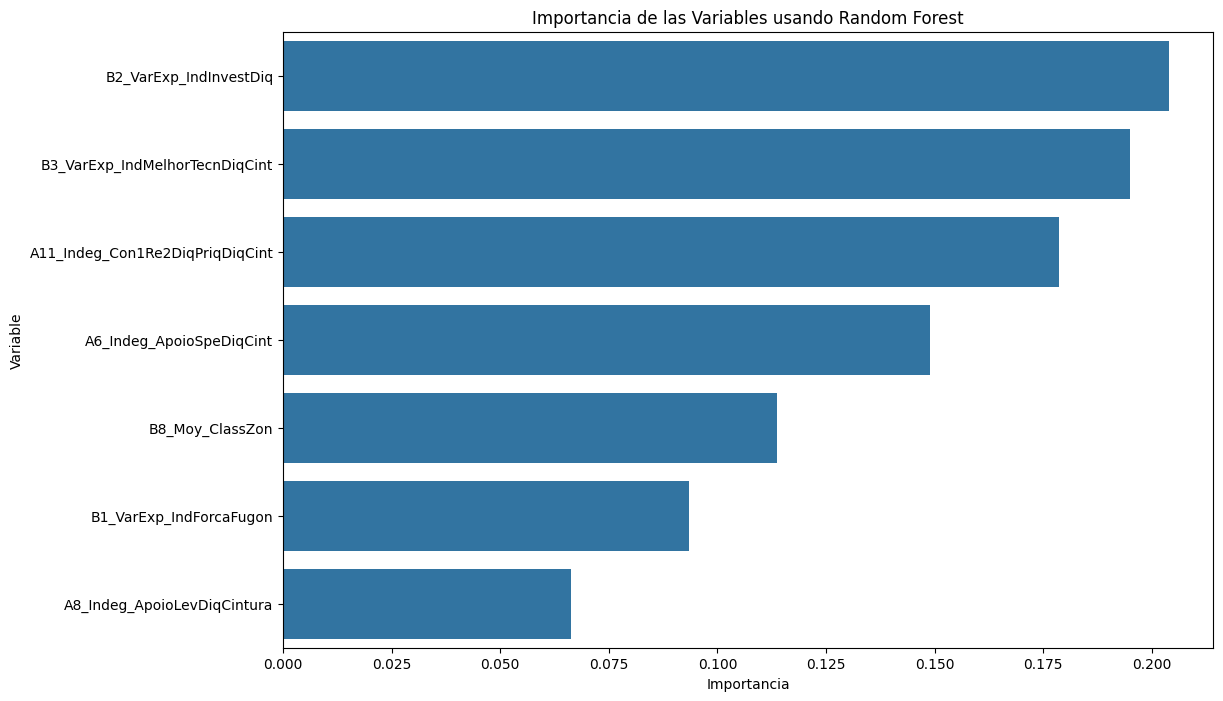

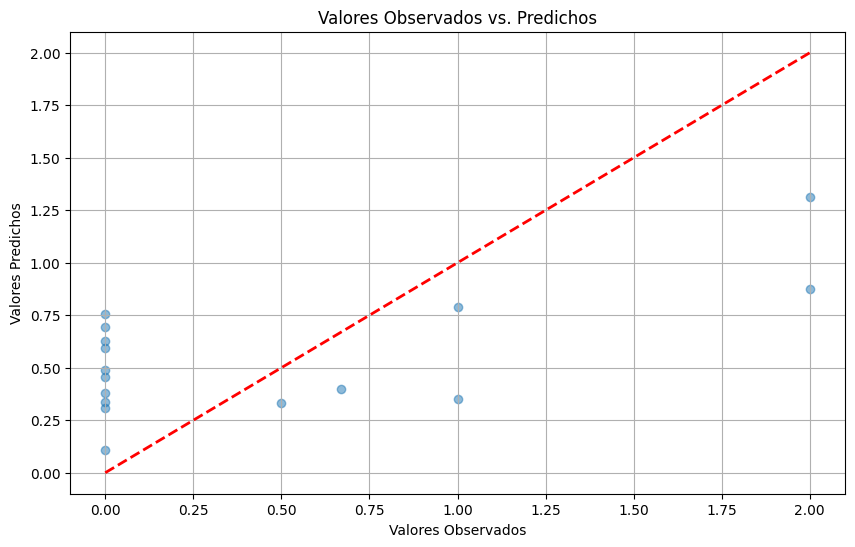

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calculate R^2 manually (this value should be the correct one)
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) * (y_test - y_mean))
ss_residual = np.sum((y_test - y_pred_test) * (y_test - y_pred_test))
r2 = 1 - (ss_residual / ss_total)

n = len(y_test)
p = X_test_scaled.shape[1]

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Calculate feature importance
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Variable', data=importance_df)
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Create a plot of Observed vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Observed vs. Predicted Values')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [ ]:
# Save observed and predicted values in an Excel file
resultados_df = pd.DataFrame({
    'Valores Observados': y_test,
    'Valores Predichos': y_pred_test
})

# Excel file path
ruta_archivo = '../Results/resultados_observados_vs_predichos_all.xlsx'
resultados_df.to_excel(ruta_archivo, index=False)
print(f"Valores observados y predichos guardados en {ruta_archivo}")

Valores observados y predichos guardados en ../Results/resultados_observados_vs_predichos_all.xlsx


In [ ]:
# Define the exit route
output_path_importances = "../Results/importances_all.csv"
os.makedirs("../Results/", exist_ok=True)

# Save the 10 highest interactions in a CSV file

importance_df.to_csv(output_path_importances, index=True)

In [ ]:
from sklearn.inspection import partial_dependence

variables = X.columns

# Calculate the importance and direction of interactions
interaction_importances = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        pdp = partial_dependence(rf, X_train_scaled, features=[i, j], kind="average")
        pdp_values = pdp['average'][0]
        
        # Calculate the importance of the interaction
        interaction_importance = np.mean(np.abs(pdp_values - pdp_values.mean()))
        
        # Calculate the direction of the interaction
        direction = np.mean(np.diff(pdp_values, axis=0))
        
        interaction_importances.append(((variables[i], variables[j]), interaction_importance, direction))

# Sort interactions by importance
interaction_importances = sorted(interaction_importances, key=lambda x: x[1], reverse=True)
interaction_importance_df = pd.DataFrame(interaction_importances, columns=['Interacción', 'Importancia', 'Dirección'])

In [ ]:
# Show top 10 interactions
interaction_importance_df.head(10)

,Interacción,Importancia,Dirección
0,"(A6_Indeg_ApoioSpeDiqCint, A11_Indeg_Con1Re2Di...",0.176102,0.079792
1,"(B2_VarExp_IndInvestDiq, B3_VarExp_IndMelhorTe...",0.167833,-0.063745
2,"(A11_Indeg_Con1Re2DiqPriqDiqCint, B3_VarExp_In...",0.166430,-0.033784
3,"(A6_Indeg_ApoioSpeDiqCint, B2_VarExp_IndInvest...",0.146920,0.084815
4,"(A11_Indeg_Con1Re2DiqPriqDiqCint, B2_VarExp_In...",0.143066,-0.031317
5,"(A11_Indeg_Con1Re2DiqPriqDiqCint, B8_Moy_Class...",0.131097,-0.030892
6,"(A8_Indeg_ApoioLevDiqCintura, A11_Indeg_Con1Re...",0.128248,0.009053
7,"(A6_Indeg_ApoioSpeDiqCint, B3_VarExp_IndMelhor...",0.119424,0.069333
8,"(A6_Indeg_ApoioSpeDiqCint, B8_Moy_ClassZon)",0.105561,0.080271
9,"(A6_Indeg_ApoioSpeDiqCint, A8_Indeg_ApoioLevDi...",0.104534,0.089922


In [ ]:
# Sort the DataFrame by the column of importance in descending order
interaction_importance_df_sorted = interaction_importance_df.sort_values(by='Importancia', ascending=False)

# Select the 10 highest interactions
top_10_interactions = interaction_importance_df_sorted.head(10)

# Definir la ruta de salida
output_path = "../Results/interactions_modeled_all.csv"
os.makedirs("../Results/", exist_ok=True)

# Save the 10 highest interactions in a CSV file
try:
    top_10_interactions.to_csv(output_path, index=True)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

Archivo guardado exitosamente en ../Results/interactions_modeled_all.csv.


In [ ]:
# Combine training and test predictions for the entire data set
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_all = np.concatenate([y_train, y_test])

In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_all, y_pred_all)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_all, y_pred_all)
r2 = r2_score(y_all, y_pred_all)
pearson_corr, _ = pearsonr(y_all, y_pred_all)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")

Mean Squared Error (MSE): 0.1391
Root Mean Squared Error (RMSE): 0.3729
Mean Absolute Error (MAE): 0.2990
R^2 Score: 0.7408
Pearson Correlation: 0.9044


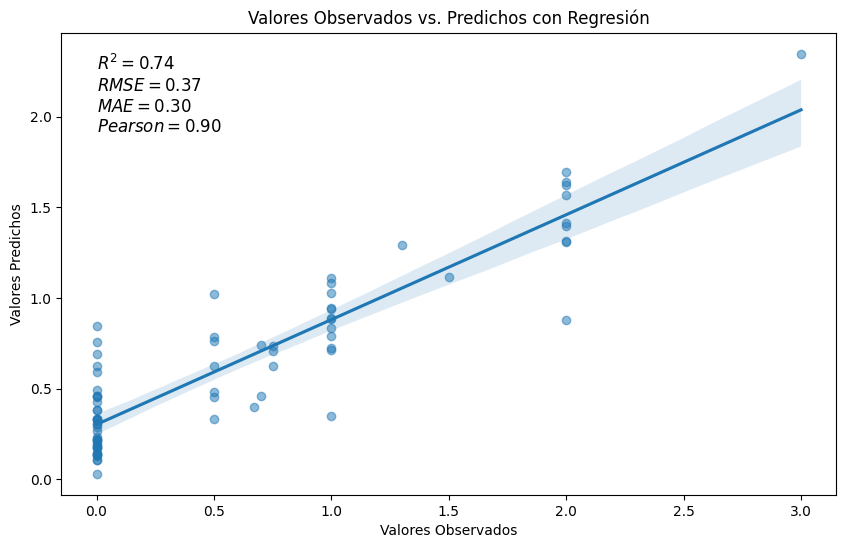

In [ ]:
# To create a graph of Observed vs. Predicted Values with regression
plt.figure(figsize=(10, 6))
sns.regplot(x=y_all, y=y_pred_all, scatter_kws={'alpha':0.5})
# plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos con Regresión')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.text(min(y_all), max(y_pred_all), f'$R^2 = {r2:.2f}$\n$RMSE = {rmse:.2f}$\n$MAE = {mae:.2f}$\n$Pearson = {pearson_corr:.2f}$', fontsize=12, verticalalignment='top')
plt.grid(False)
plt.show()